In [30]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.preprocessing import MinMaxScaler # for scaling data
from sklearn.model_selection import train_test_split # for splitting data set
from sklearn.linear_model import LinearRegression # machine learning model used
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # model evaluation metrics

In [2]:
df = pd.read_csv('advertising.csv') # read the data from the CSV file

### Exploratory Data Analysis

In [3]:
df.head() # displays rows from the top of the dataframe

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe().round(3) # calculates statistical values and rounds them to 2 decimal places

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,15.131
std,85.854,14.847,21.779,5.284
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,11.000
50%,149.750,22.900,25.750,16.000
75%,218.825,36.525,45.100,19.050
max,296.400,49.600,114.000,27.000


In [5]:
df.isnull().sum() # mark null values as True and returns sum of number of True values in each column

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum() # shows number of duplicated entries in the dataframe

0

Initial Impressions of the Dataset
1. 200 rows and 4 columns
2. No duplicated values
3. No null values

### Data Visualization

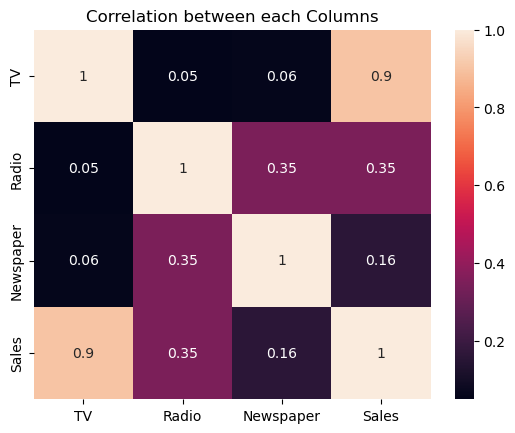

In [7]:
sns.heatmap(df.corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places and also all the values will be shown in each cell of the matrix
plt.title('Correlation between each Columns')  # title for the plot
plt.show()

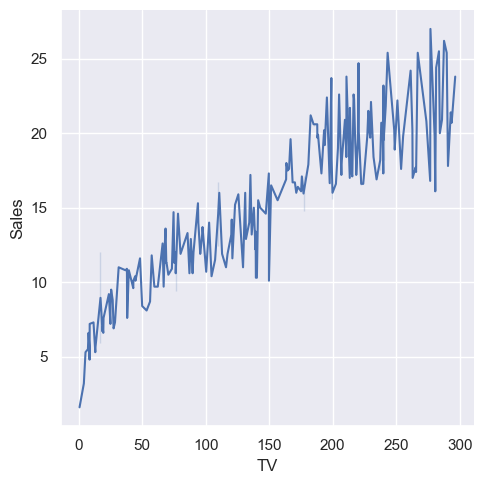

In [8]:
sns.set(style='darkgrid') # set the background of the plot to darkgrid
sns.relplot(data=df, x="TV", y="Sales", kind="line") # plot the data with TV as x-axis and Sales as y-axis

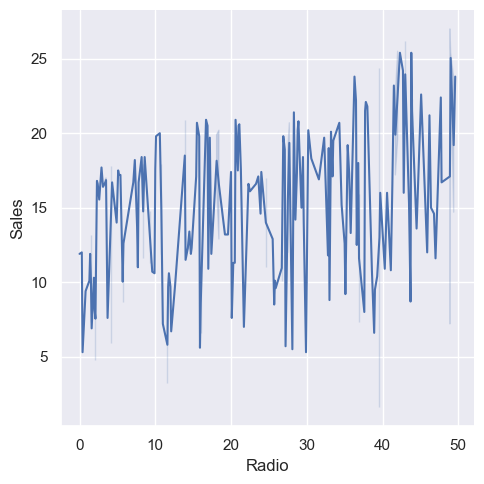

In [9]:
sns.set(style='darkgrid') # set the background of the plot to darkgrid
sns.relplot(data=df, x="Radio", y="Sales", kind="line") # plot the data with Radio as x-axis and Sales as y-axis

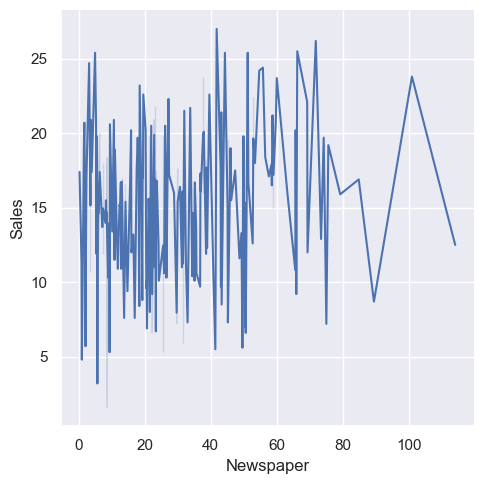

In [10]:
sns.set(style='darkgrid') # set the background of the plot to darkgrid
sns.relplot(data=df, x="Newspaper", y="Sales", kind="line") # plot the data with Newspaper as x-axis and Sales as y-axis

### Pre-Processing the Data

In [11]:
scaled = MinMaxScaler().fit_transform(df) # scale the data using MinMaxScaler
df = pd.DataFrame(scaled, columns=df.columns) # convert the scaled data into a dataframe

### Training the Model

In [12]:
# Splitting target column from other columns
col = [c for c in df.columns.to_list() if c not in ['Sales']]
X = df[col]
Y = df['Sales']

In [13]:
# Further splitting the data into training and testing parts
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.50, random_state=42)

In [25]:
lin = LinearRegression() # Making the object of Linear Regression
lin.fit(X_train, Y_train) # Training the model on test data

LinearRegression()

In [31]:
# Evaluating the model through different evaluation metrics
accuracy = lin.score(X_test, Y_test)
mae = mean_absolute_error(Y_test, lin.predict(X_test))
mse = mean_squared_error(Y_test, lin.predict(X_test))
r2 = r2_score(Y_test, lin.predict(X_test))

In [32]:
# Showing the values
print("Accuracy:", accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2-score:", r2)

Accuracy: 0.907313434112335
Mean Absolute Error: 0.047290140435736185
Mean Squared Error: 0.003997612559840254
R2-score: 0.907313434112335
